In [8]:
# Data wrangling
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer

## -- Machine learning -- ##
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from kmodes.kmodes import KModes            # clustering categorical data
from kmodes.kprototypes import KPrototypes  # clustering mixed data

# Didatic purposes
import string
from ipywidgets import interact

In [35]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='tab10',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)

In [9]:
# Simulate clusters
# Simulate clusters
X,y = datasets.make_blobs(n_samples=int(1E3), n_features=2, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,-2.256086,7.858356
1,0.568548,3.953328
2,-2.602152,8.418937
3,-2.625338,2.063689
4,2.286564,1.227960


<AxesSubplot:xlabel='A', ylabel='B'>

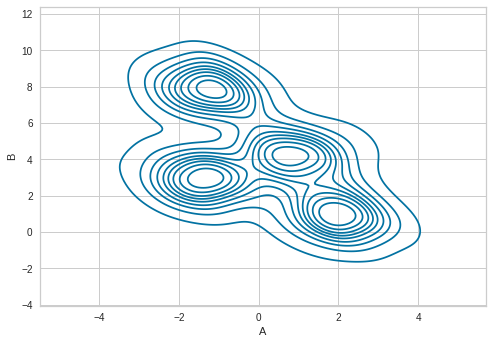

In [15]:
sns.kdeplot(data=df, x='A', y='B')

In [ ]:
model = MeanShift()
labels = model.fit_predict(X)

In [24]:
estimate_bandwidth(X, quantile=0.3, n_samples=None, random_state=None)

2.822735629625506

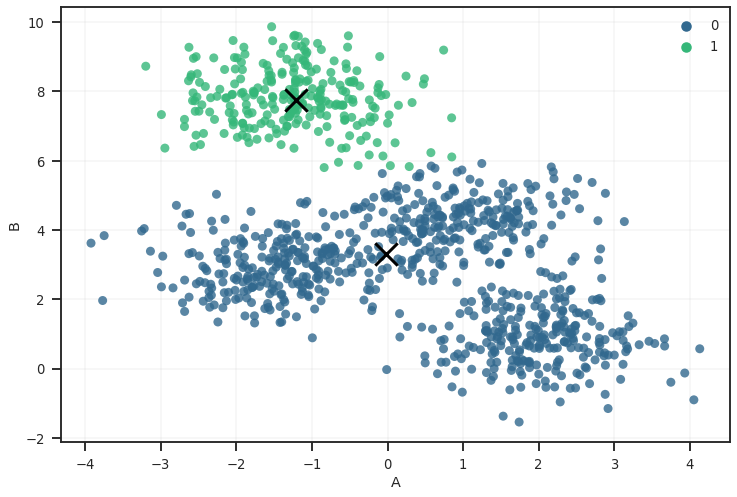

In [37]:
ax = sns.scatterplot(x="A", y="B", hue=labels, data=df, **scatter_kwargs)
ax.scatter(*model.cluster_centers_.T, marker='x', s=500, linewidths=3, c='black', zorder=10)
plt.show()


In [41]:
@interact(bandwidth=(0.1, 3.0, 0.01))
def plot_kmeans(bandwidth):
    model = MeanShift(bandwidth=bandwidth)
    labels = model.fit_predict(X)
    ax = sns.scatterplot(x="A", y="B", hue=labels, data=df, **scatter_kwargs)
    ax.scatter(*model.cluster_centers_.T, marker='x', s=500, linewidths=3, c='black', zorder=10)
    plt.show()

interactive(children=(FloatSlider(value=1.55, description='bandwidth', max=3.0, min=0.1, step=0.01), Output())…